# Polynomial Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"E:\Machine learning\Tenserflow\bangalore.csv")

In [9]:
df.shape

(13320, 9)

In [12]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [10]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_per

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [16]:
missing_value_clm_gre_20 = missing_value_per[missing_value_per > 20].keys()
missing_value_clm_gre_20

Index(['society'], dtype='object')

In [18]:
df2_drop_clm = df.drop(columns=missing_value_clm_gre_20)
df2_drop_clm.shape

(13320, 8)

In [19]:
df3_num=df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num.head()

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00


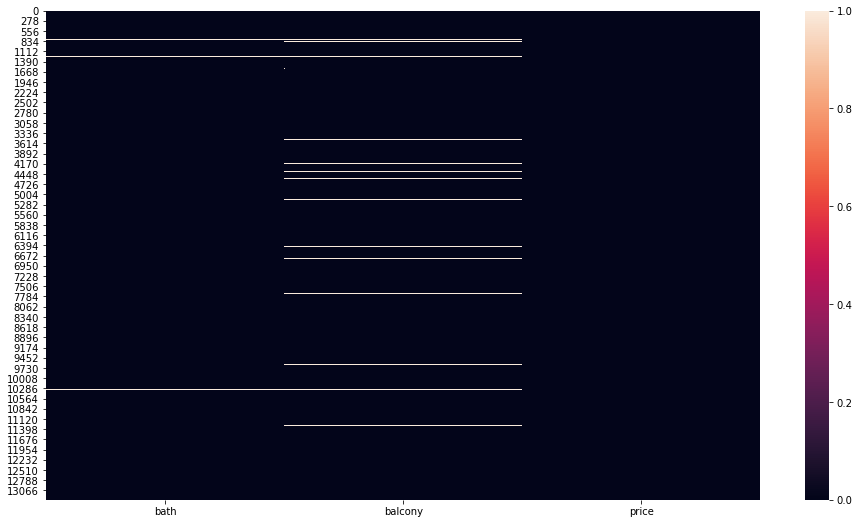

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(df3_num.isnull())

In [21]:
df3_num[df3_num.isnull().any(axis=1)]

,bath,balcony,price
6,4.0,NaN,204.000
7,4.0,NaN,600.000
9,6.0,NaN,370.000
34,3.0,NaN,125.000
40,2.0,NaN,81.000
45,9.0,NaN,200.000
56,NaN,NaN,192.000
81,NaN,NaN,224.500
140,8.0,NaN,250.000
146,3.0,NaN,110.000


In [22]:
df3_num.isnull().sum()

bath        73
balcony    609
price        0
dtype: int64

In [23]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['bath', 'balcony']

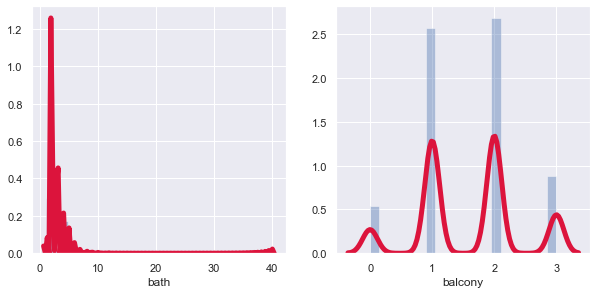

In [25]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [26]:
df4_num_mean = df3_num.fillna(df3_num.mean())
df4_num_mean.isnull().sum().sum()

0

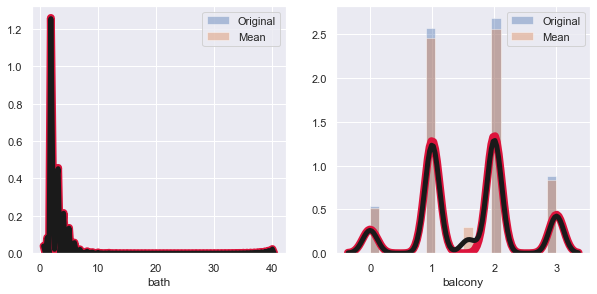

In [28]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20, kde_kws={'linewidth':8, 'color':'#DC143C'}, label="Original")
    sns.distplot(df4_num_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'k'}, label="Mean")    
    plt.legend()

In [29]:
df5_num_median = df3_num.fillna(df3_num.median())
df5_num_median.isnull().sum().sum()

0

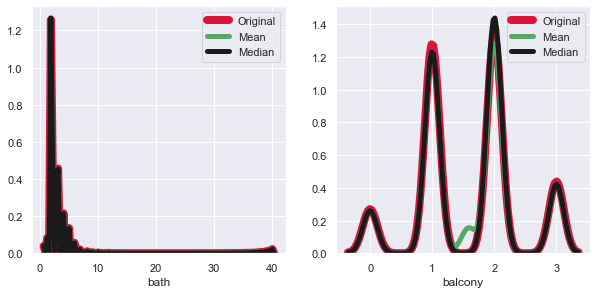

In [30]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20, hist=False, kde_kws={'linewidth':8, 'color':'#DC143C'}, label="Original")
    sns.distplot(df4_num_mean[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'g'}, label="Mean")    
    sns.distplot(df5_num_median[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'k'}, label="Median")
    plt.legend()

In [31]:
df4_num_mean


,bath,balcony,price
0,2.00000,1.000000,39.070
1,5.00000,3.000000,120.000
2,2.00000,3.000000,62.000
3,3.00000,1.000000,95.000
4,2.00000,1.000000,51.000
5,2.00000,1.000000,38.000
6,4.00000,1.584376,204.000
7,4.00000,1.584376,600.000
8,3.00000,1.000000,63.250
9,6.00000,1.584376,370.000
